In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
df = pd.read_csv("../lego.population.csv", sep = ",", encoding = "latin1")
df

,Item_Number,Set_Name,Theme,Pieces,Price,Amazon_Price,Year,Ages,Pages,Minifigures,Packaging,Weight,Unique_Pieces,Availability,Size
0,41916,Extra Dots - Series 2,DOTS,109.0,$3.99,$3.44,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
1,41908,Extra Dots - Series 1,DOTS,109.0,$3.99,$3.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
2,11006,Creative Blue Bricks,Classic,52.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,28.0,Retail,Small
3,11007,Creative Green Bricks,Classic,60.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,36.0,Retail,Small
4,41901,Funky Animals Bracelet,DOTS,33.0,$4.99,$4.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,10.0,Retail,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,45678,SPIKE Prime Set,LEGO® Education,528.0,$329.95,NaN,2020,Ages_10+,NaN,2.0,NaN,NaN,108.0,NaN,Small
1300,71367,Mario's House & Yoshi,LEGO® Super Mario,205.0,$29.99,NaN,2020,Ages_6+,NaN,2.0,Box,NaN,114.0,Retail,Small
1301,71368,Toad's Treasure Hunt,LEGO® Super Mario,464.0,$69.99,NaN,2020,Ages_8+,NaN,4.0,Box,NaN,195.0,Retail,Small
1302,71369,Bowser's Castle Boss Battle,LEGO® Super Mario,1010.0,$99.99,NaN,2020,Ages_8+,NaN,NaN,Box,NaN,346.0,Retail,Small


In [3]:
# fjerner forklaringsvariabler vi ikke trenger
df2 = df[['Set_Name', 'Theme', 'Pieces', 'Price', 'Pages', 'Minifigures', 'Unique_Pieces']]

# fjerner observasjoner med manglende datapunkter
df2 = df2.dropna()

# gjør themes om til string og fjern alle tegn vi ikke vil ha med
df2['Theme'] = df2['Theme'].astype(str)
df2['Theme'] = df2['Theme'].str.replace(r'[^a-zA-Z0-9\s-]', '', regex = True)

# fjerner dollartegn og trademark-tegn fra datasettet
df2['Price'] = df2['Price'].str.replace('\$', '', regex = True)

# og gjør så prisen om til float
df2['Price'] = df2['Price'].astype(float)

df2

,Set_Name,Theme,Pieces,Price,Pages,Minifigures,Unique_Pieces
13,Stephanie's Summer Heart Box,Friends,95.0,7.99,40.0,1.0,52.0
16,Woody & RC,Disney,69.0,9.99,28.0,1.0,36.0
17,Mia's Summer Heart Box,Friends,85.0,7.99,36.0,1.0,41.0
18,Olivia's Summer Heart Box,Friends,93.0,7.99,40.0,2.0,48.0
19,Police Patrol Car,City,92.0,9.99,36.0,1.0,52.0
...,...,...,...,...,...,...,...
1171,1989 Batmobile,Batman,3306.0,249.99,404.0,3.0,484.0
1172,Tree House,Ideas,3036.0,199.99,428.0,4.0,482.0
1173,Welcome to Apocalypseburg!,THE LEGO MOVIE 2,3178.0,299.99,452.0,13.0,692.0
1174,Jurassic Park: T. rex Rampage,Jurassic World,3120.0,249.99,464.0,6.0,525.0


In [6]:
allthemes = {
    'Star Wars',
    'THE LEGO MOVIE 2',
    'Juniors',
    'Powered UP',
    'Classic',
    'Hidden Side',
    'Monkie Kid',
    'NINJAGO',
    'Powerpuff Girls',
    'Unikitty',
    'Friends',
    'Speed Champions',
    'Trolls World Tour',
    'Marvel',
    'Minecraft',
    'DC',
    'Stranger Things',
    'Batman',
    'DUPLO',
    'Overwatch',
    'LEGO Frozen 2',
    'Creator 3-in-1',
    'Minions',
    'Disney',
    'Jurassic World',
    'City',
    'Minifigures',
    'Harry Potter',
    'Ideas',
    'Creator Expert',
    'Spider-Man'
}

trademarked = {
    'Spider-Man',
    'Powerpuff Girls',
    'Minions',
    'Stranger Things',
    'Star Wars',
    'Marvel',
    'Disney',
    'Harry Potter',
    'Minecraft',
    'Jurassic World',
    'Batman',
    'DC',
    'Trolls World Tour',
    'Overwatch',
    'LEGO Frozen 2'
}

uncertain = {
    'Unikitty',
    'Minifigures',
    'THE LEGO MOVIE 2',
    'Speed Champions',
    'Juniors',
    'Creator Expert'
}

notrademark = {
    'Monkie Kid',
    'Friends',
    'City',
    'NINJAGO',
    'DUPLO',
    'Creator 3-in-1',
    'Hidden Side',
    'Ideas',
    'Classic',
    'Powered UP'
}

# verify that the groups are correct
assert (trademarked | uncertain | notrademark) == allthemes

df_trademark   = df2[df2['Theme'].isin(trademarked)]
df_uncertain   = df2[df2['Theme'].isin(uncertain)]
df_notrademark = df2[df2['Theme'].isin(notrademark)]

df_uncertain



,Set_Name,Theme,Pieces,Price,Pages,Minifigures,Unique_Pieces
20,Prince Puppycorn Trike,Unikitty,101.0,9.99,56.0,3.0,65.0
42,Unikitty Cloud Car,Unikitty,126.0,9.99,60.0,3.0,83.0
67,Unikitty's Sweetest Friends EVER!,THE LEGO MOVIE 2,76.0,9.99,36.0,3.0,50.0
70,Chevrolet Camaro ZL1 Race Car,Speed Champions,198.0,14.99,60.0,1.0,81.0
71,McLaren Senna,Speed Champions,219.0,14.99,64.0,1.0,92.0
...,...,...,...,...,...,...,...
1057,Emmet's Builder Box!,THE LEGO MOVIE 2,125.0,29.99,56.0,1.0,76.0
1112,Emmet's Triple-Decker Couch Mech,THE LEGO MOVIE 2,312.0,29.99,92.0,3.0,98.0
1135,Winter Village Fire Station,Creator Expert,1166.0,99.99,136.0,8.0,323.0
1166,Haunted House,Creator Expert,3231.0,249.99,312.0,8.0,467.0


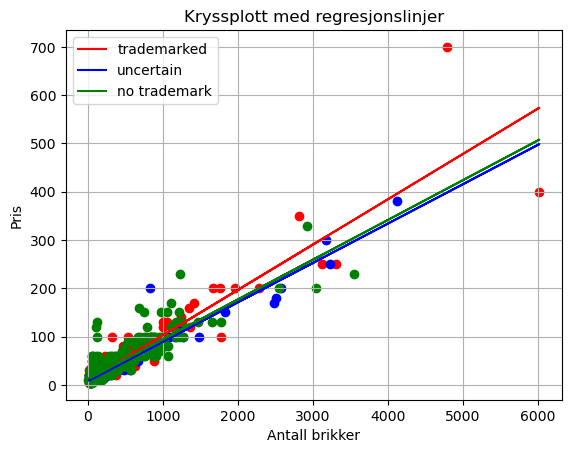

In [17]:
results = []

subsets = [
    {
        "data": df_trademark, 
        "name": "trademarked",
        "color" : "red"
    },
    {
        "data": df_uncertain,
        "name": "uncertain",
        "color": "blue"
    },
    {
        "data": df_notrademark,
        "name": "no trademark",
        "color": "green"
    }
]

for subset in subsets:
    data = subset['data']
    model3 = smf.ols('Price ~ Pieces' , data = data)
    fit = model3.fit()
    
    results.append(model3.fit())
    
    slope = fit.params['Pieces']
    intercept = fit.params['Intercept']

    reg_x = np.array(theme['Pieces'])
    reg_y = slope * reg_x + intercept

    # Plot scatter plot and regression line
    plt.scatter(data['Pieces'], data['Price'], color=subset['color'])
    plt.plot(reg_x, reg_y, color=subset['color'], label=subset['name'])
    
plt.xlabel('Antall brikker')
plt.ylabel('Pris')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()